In [10]:
import pandas as pd

# Assuming your data is loaded into a DataFrame called 'df'
# Sample data loading: df = pd.read_csv("your_data_file.csv")

# Grouping by subreddit and topic, and then counting the number of occurrences
topic_counts = df.groupby(['subreddit', 'topic']).size().reset_index(name='counts')

# Sorting and taking the top 3 topics for each subreddit
top_3_topics = topic_counts.groupby('subreddit').apply(lambda x: x.sort_values('counts', ascending=False).head(3)).reset_index(drop=True)

# Displaying the top 3 most used topics for each subreddit
# Use option_context to temporarily set display options
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
    print(top_3_topics)


            subreddit  topic  counts
0          GrandForks      1       1
1            Kamloops      1      22
2            Kamloops      4      15
3            Kamloops      7       4
4   KamloopsWxRecords      3       1
5           KelownaBC      8       2
6           KelownaBC      0       1
7           KelownaBC      1       1
8             LumbyBC      4       6
9             LumbyBC      1       4
10            LumbyBC      7       2
11          MissionBC      1       1
12          MissionBC      6       1
13         Revelstoke      4       1
14           Squamish      1      13
15           Squamish      4       3
16           Squamish      3       2
17    VancouverIsland      1      25
18    VancouverIsland      8       4
19    VancouverIsland      4       3
20         VictoriaBC      1      83
21         VictoriaBC      4      27
22         VictoriaBC      3       9
23          WhiteRock      1       1
24   WilliamsLakeNews      0     124
25   WilliamsLakeNews      8      33
2

In [9]:
for topic, group in df.groupby('topic'):
    print(f"Topic: {topic}")
    for index, row in group.head(3).iterrows():
        print(f"Post ID: {row['id']}, Text: {row['text']}\n")
    print("\n")


Topic: 0
Post ID: 15g20gx, Text: gun lake, n of pemberton fire the fire is spreading quickly and it’s only 300 km away. there seems to be an awful lot of fires around here lately, too. how nervous should we be?

Post ID: 15xn1w0, Text: lochview rd - friday 18th, 9:45pm snapped these of traders cove from across the lake before it jumped. glad to see our first responders come out in full force! drop a case of beer off at the fire hall when you can loudly_crying_face 

Post ID: 15lo0n9, Text: what happened at alouette lake? my family and i visited alouette lake this past sunday and saw ambulance, fire truck and helicopter at the lake. does anyone know what happened and if people were ok?



Topic: 1
Post ID: 15o5t72, Text: lasagna love  hi everyone! i'm lucky to be part of a great nonprofit, lasagna love, and along with a group of amazing people, we are making and delivering home-cooked lasagnas for any families who need a helping hand. lost childcare, lost income, lost sanity...lasagna l

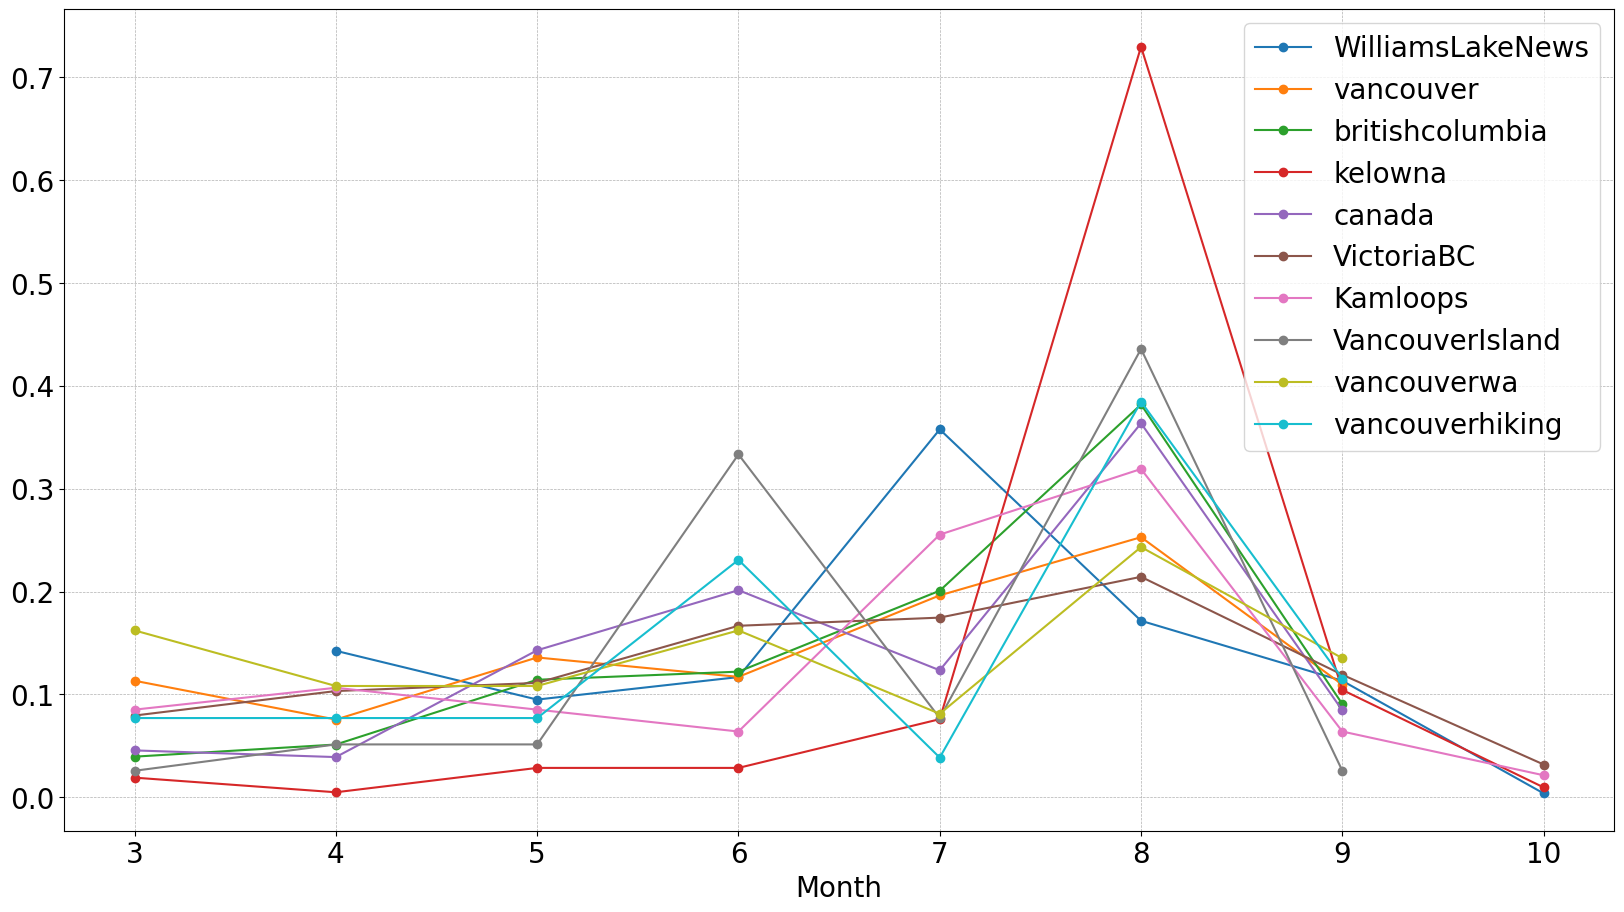

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('reddit_topic.csv')

# Convert the 'created_utc' column to datetime format
df['created_datetime'] = pd.to_datetime(df['created_utc'], unit='s')

# Extract the hour, weekday, and month from the 'created_datetime' column
df['hour'] = df['created_datetime'].dt.hour
df['weekday'] = df['created_datetime'].dt.weekday
df['month'] = df['created_datetime'].dt.month

# Determine the top 10 subreddits with the most posts
top_subreddits = df['subreddit'].value_counts().head(10).index

def visualize_subreddit_activity(time_period):
    """Visualizes the activity pattern for top subreddits based on the specified time period (hour, weekday, or month)"""
    
    plt.figure(figsize=(15, 8))
    
    # For each subreddit in the top 10, plot the activity pattern
    for subreddit in top_subreddits:
        subreddit_data = df[df['subreddit'] == subreddit]
        activity_counts = subreddit_data[time_period].value_counts().sort_index()
        
        # Normalize data for better visualization
        normalized_counts = activity_counts / activity_counts.sum()
        
        plt.plot(activity_counts.index, normalized_counts, label=subreddit, marker='o')
    
    plt.xlabel(time_period.capitalize())
    plt.legend(loc='upper right')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams.update({'font.size': 20})
    fig = plt.gcf()
    width = 20
    aspect_ratio = fig.get_figheight() / fig.get_figwidth()
    fig.set_size_inches(width, width * aspect_ratio)

    plt.show()



# Visualize activity by month for the top 10 subreddits
visualize_subreddit_activity('month')
